---
title: "Poster for ProbGen24, Vienna"
author: "Saikat Banerjee"
format:
  html: default
date: "2024-04-08"
file-modified: "2024-04-08"
abstract: "High quality plots used in the poster for ProbGen24, using NYGC color palette."

---

# Setup

In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io

import matplotlib
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

In [2]:
import matplotlib.font_manager as mpl_fm
font_path = '/gpfs/commons/home/sbanerjee/nygc/Futura'
mpl_fm.fontManager.addfont(font_path + '/FuturaStd-Book.otf') # Loads "Futura Std"

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
# futura_book = FontProperties(fname='/gpfs/commons/home/sbanerjee/nygc/Futura/FuturaStd-Book.otf')

# NYGC Color Palette
nygc_colors = {
    'brown': '#7F0814',
    'darkred': '#d42e12',
    'orange': '#F37239',
    'darkyellow': '#F79320',
    'yellow': '#FFE438',
    'darkblue': '#003059',
    'blue': '#266DB6',
    'lightblue': '#A3D5ED',
    'darkgreen': '#006838',
    'green': '#0A8A42',
    'lightgreen': '#74B74A',
    'yellowgreen': '#BAD75F',
    'darkgray': '#1A1A1A',
    'gray': '#666666',
    'lightgray': '#CCCCCC',
    'khaki': '#ADA194',
    'darkkhaki': '#5E514D',
}

# Style sheet for NYGC poster
mpl_stylesheet.banskt_presentation(dpi = 300, fontsize = 28, 
    splinecolor = nygc_colors['darkgray'], black = nygc_colors['darkgray'])
plt.rcParams['font.family'] = 'Futura Std'

# Simulation Plots

In [3]:
dsc_output = "/gpfs/commons/groups/knowles_lab/sbanerjee/low_rank_matrix_approximation_numerical_experiments/blockdiag"
dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
db = os.path.join(dsc_output, dsc_fname + ".db")
dscoutpkl = os.path.join("/gpfs/commons/home/sbanerjee/work/npd/lrma-dsc/dsc/results", dsc_fname + "_dscout.pkl")
dscout    = pd.read_pickle(dscoutpkl)
dscout

DSC      simulate  simulate.n  simulate.p  simulate.k  simulate.h2   
0      1     blockdiag       200.0      2000.0        10.0          0.2  \
1      2     blockdiag       200.0      2000.0        10.0          0.2   
2      3     blockdiag       200.0      2000.0        10.0          0.2   
3      4     blockdiag       200.0      2000.0        10.0          0.2   
4      5     blockdiag       200.0      2000.0        10.0          0.2   
..   ...           ...         ...         ...         ...          ...   
895    8  blockdiag_aq       200.0      2000.0        10.0          0.2   
896    9  blockdiag_aq       200.0      2000.0        10.0          0.2   
897    9  blockdiag_aq       200.0      2000.0        10.0          0.2   
898   10  blockdiag_aq       200.0      2000.0        10.0          0.2   
899   10  blockdiag_aq       200.0      2000.0        10.0          0.2   

     simulate.h2_shared_frac  simulate.aq lowrankfit      matfactor   
0                        0.5          0.6  identical  truncated_svd  \
1                        0.5          0.6  identical  truncated_svd   
2                        0.5          0.6  identical  truncated_svd   
3                        0.5          0.6  identical  truncated_svd   
4                        0.5          0.6  identical  truncated_svd   
..                       ...          ...        ...            ...   
895                      0.5          0.8  identical       factorgo   
896                      0.5          0.4  identical       factorgo   
897                      0.5          0.8  identical       factorgo   
898                      0.5          0.4  identical       factorgo   
899                      0.5          0.8  identical       factorgo   

     score.L_rmse  score.F_rmse  score.Z_rmse  score.L_psnr  score.F_psnr   
0        0.244982      0.414399      0.004264     28.429593     26.081163  \
1        0.264152      0.417129      0.004318     28.688465     25.536584   
2        0.252526      0.419340      0.004285     28.831802     25.198688   
3        0.285154      0.409911      0.004718     28.881899     25.741441   
4        0.292962      0.420819      0.004262     27.246965     25.527629   
..            ...           ...           ...           ...           ...   
895      0.597619      0.720961      0.002017     20.790216     21.536737   
896      0.201241      0.400942      0.002174     30.378105     26.809769   
897      0.509286      0.669955      0.002038     21.469111     20.631187   
898      0.270847      0.429577      0.002189     28.086705     25.500348   
899      0.626669      0.756680      0.002087     19.320562     20.277492   

     score.Z_psnr  score.adj_MI  
0       23.105261      0.018100  
1       23.284510      0.015638  
2       23.760390      0.654857  
3       24.626305      0.561981  
4       23.594094      0.024386  
..            ...           ...  
895     30.477673      0.010297  
896     29.938074     -0.009727  
897     28.405981      0.003175  
898     30.518931      0.022548  
899     30.701310     -0.004610  

[900 rows x 17 columns]

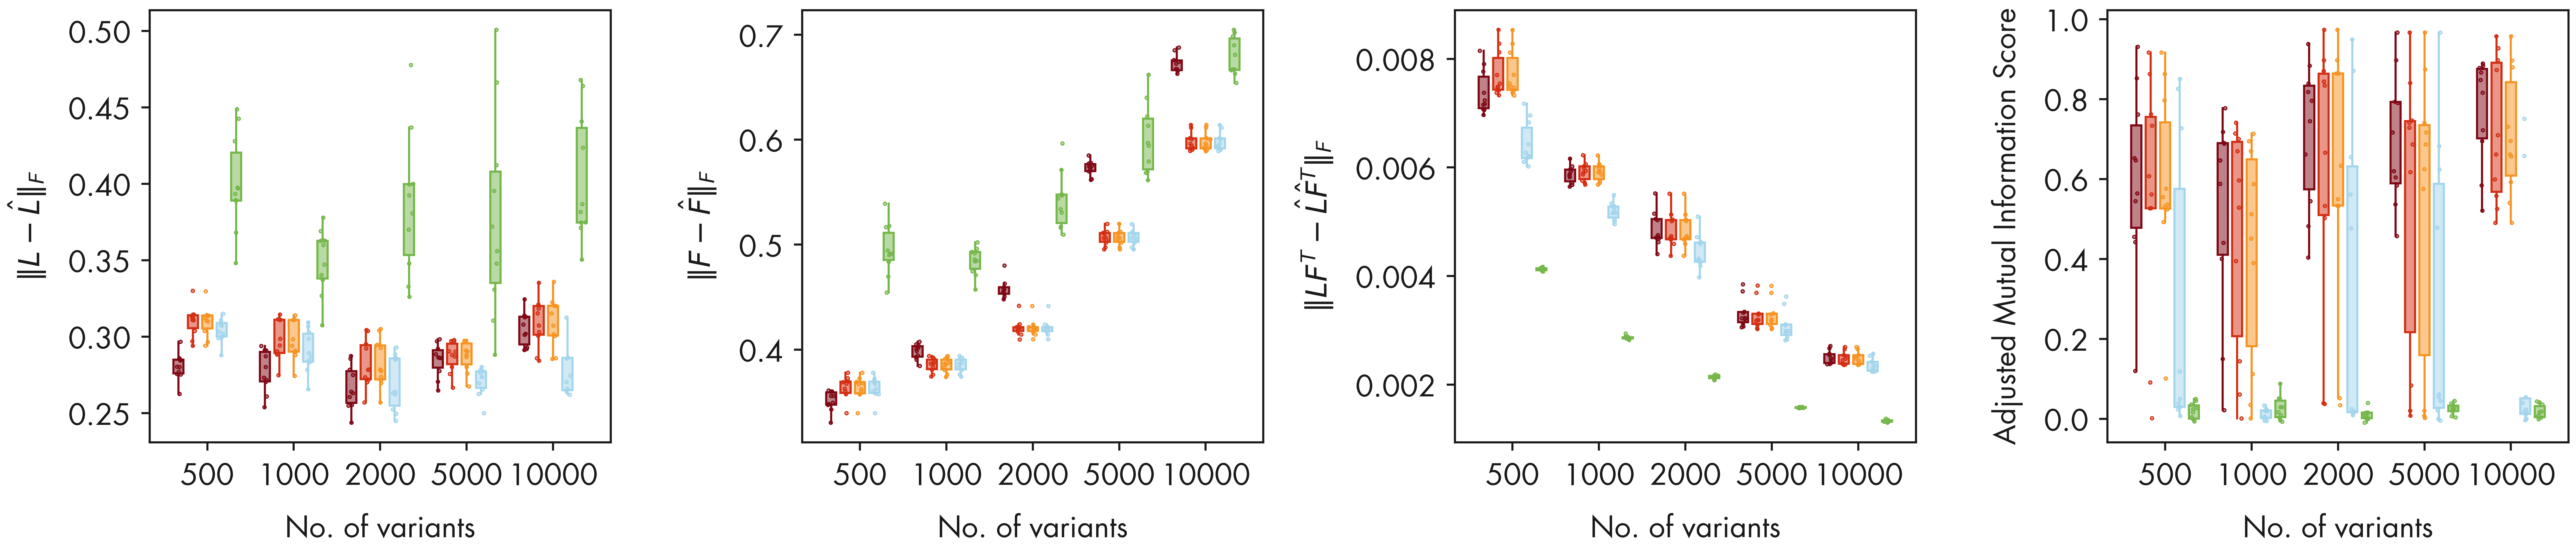

In [7]:
def stratify_dfcol(df, colname, value):
    #return pd_utils.select_dfrows(df, [f"$({colname}) == {value}"])
    return df.loc[df[colname] == value]

def stratify_dfcols(df, condition_list):
    for (colname, value) in condition_list:
        df = stratify_dfcol(df, colname, value)
    return df

def stratify_dfcols_in_list(df, colname, values):
    return df.loc[df[colname].isin(values)]

methods = {
    "rpca" : ["rpca", "truncated_svd"],
    "nnm"  : ["nnm", "truncated_svd"],
    "nnm_sparse" : ["nnm_sparse", "truncated_svd"],
    "truncated_svd" : ["identical", "truncated_svd"],
    "factorgo" : ["identical", "factorgo"],
}
method_labels = {
    "rpca" : "RobustPCA",
    "nnm" : "NNM",
    "nnm_sparse" : "NNM-Sparse",
    "truncated_svd": "tSVD",
    "factorgo": "FactorGO",
}

method_colors = {
    "rpca" : nygc_colors['brown'], # Vivid Orange
    "nnm" : nygc_colors['darkred'], # Vivid Red
    "nnm_sparse" : nygc_colors['darkyellow'], # Strong Purple
    "truncated_svd" : nygc_colors['lightblue'], # gray
    "factorgo" : nygc_colors['lightgreen'], # Very Light Blue
}

# method_colors = {
#     "rpca" : '#FF6800', # Vivid Orange
#     "nnm" : '#C10020', # Vivid Red
#     "nnm_sparse" : '#803E75', # Strong Purple
#     "truncated_svd" : '#535154', # gray
#     "factorgo" : '#A6BDD7', # Very Light Blue
# }

# Base parameters
simparams = {'p': 2000, 'k': 10, 'h2': 0.2, 'h2_shared_frac': 0.5, 'aq': 0.6}
score_names = {
    'L_rmse': r"$\| L - \hat{L}\|_F$",
    'F_rmse': r"$\| F - \hat{F}\|_F$",
    'Z_rmse': r"$\| LF^{T} - \hat{L}\hat{F}^{T}\|_F$",
    'adj_MI': "Adjusted Mutual Information Score",
}

def get_simulation_with_variable(df, var_name, var_values):
    condition = [(f'simulate.{k}', v) for k, v in simparams.items() if k != var_name]
    df1 = stratify_dfcols(df, condition)
    df2 = stratify_dfcols_in_list(df1, f'simulate.{var_name}', var_values)
    return df2

def get_scores_from_dataframe(df, score_name, variable_name, variable_values, 
        methods = methods):
    simdf = get_simulation_with_variable(df, variable_name, variable_values)
    scores = {key: list() for key in methods.keys()}
    for method, mlist in methods.items():
        mrows = stratify_dfcols(simdf, [('lowrankfit', mlist[0]), ('matfactor', mlist[1])])
        for value in variable_values:
            vrows = stratify_dfcol(mrows, f'simulate.{variable_name}', value)
            scores[method].append(vrows[f'score.{score_name}'].to_numpy())
    return scores

def random_jitter(xvals, yvals, d = 0.1):
    xjitter = [x + np.random.randn(len(y)) * d for x, y in zip(xvals, yvals)]
    return xjitter

def boxplot_scores(variable, variable_values, 
        methods = methods, score_names = score_names,
        dscout = dscout, method_colors = method_colors,
        custom_font = 'Futura Std', xlabel = "No. of variants"):
    
    nmethods = len(methods)
    nvariables = len(variable_values)
    nscores = len(score_names)
    
    figh = 8
    figw = (nscores * figh) + (nscores - 1)
    fig = plt.figure(figsize = (figw, figh))
    axs = [fig.add_subplot(1, nscores, x+1) for x in range(nscores)]
    boxs = {x: None for x in methods.keys()}
    
    for i, (score_name, score_label) in enumerate(score_names.items()):
        scores = get_scores_from_dataframe(dscout, score_name, variable, variable_values)
        for j, mkey in enumerate(methods.keys()):
            boxcolor = method_colors[mkey]
            boxface = f'#{boxcolor[1:]}80'
            medianprops = dict(linewidth=0, color = boxcolor)
            whiskerprops = dict(linewidth=2, color = boxcolor)
            boxprops = dict(linewidth=2, color = boxcolor, facecolor = boxface)
            flierprops = dict(marker='o', markerfacecolor=boxface, markersize=3, markeredgecolor = boxcolor)

            xpos = [x * (nmethods + 1) + j for x in range(nvariables)]
            boxs[mkey] = axs[i].boxplot(scores[mkey], positions = xpos,
                showcaps = False, showfliers = False,
                widths = 0.7, patch_artist = True, notch = False,
                flierprops = flierprops, boxprops = boxprops,
                medianprops = medianprops, whiskerprops = whiskerprops)
            
            axs[i].scatter(random_jitter(xpos, scores[mkey]), scores[mkey], 
                           edgecolor = boxcolor, facecolor = boxface, linewidths = 1, 
                           s = 10)

        xcenter = [x * (nmethods + 1) + (nmethods - 1) / 2 for x in range(nvariables)]
        axs[i].set_xticks(xcenter)
        axs[i].set_xticklabels(variable_values)
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(score_label)
        xlim_low = 0 - (nvariables - 1) / 2
        #xlim_high = (nvariables - 1) * (nmethods + 1) + (nmethods - 1) + (nvariables - 1) / 2
        xlim_high = (nmethods + 1.5) * nvariables - 2.5
        axs[i].set_xlim( xlim_low, xlim_high )

    plt.tight_layout()
    return axs, boxs

variable = 'p'
variable_values = [500, 1000, 2000, 5000, 10000]

axs, boxs = boxplot_scores(variable, variable_values)

plt.savefig('../plots/probgen24/numerical_experiments.png', bbox_inches='tight')
plt.show()

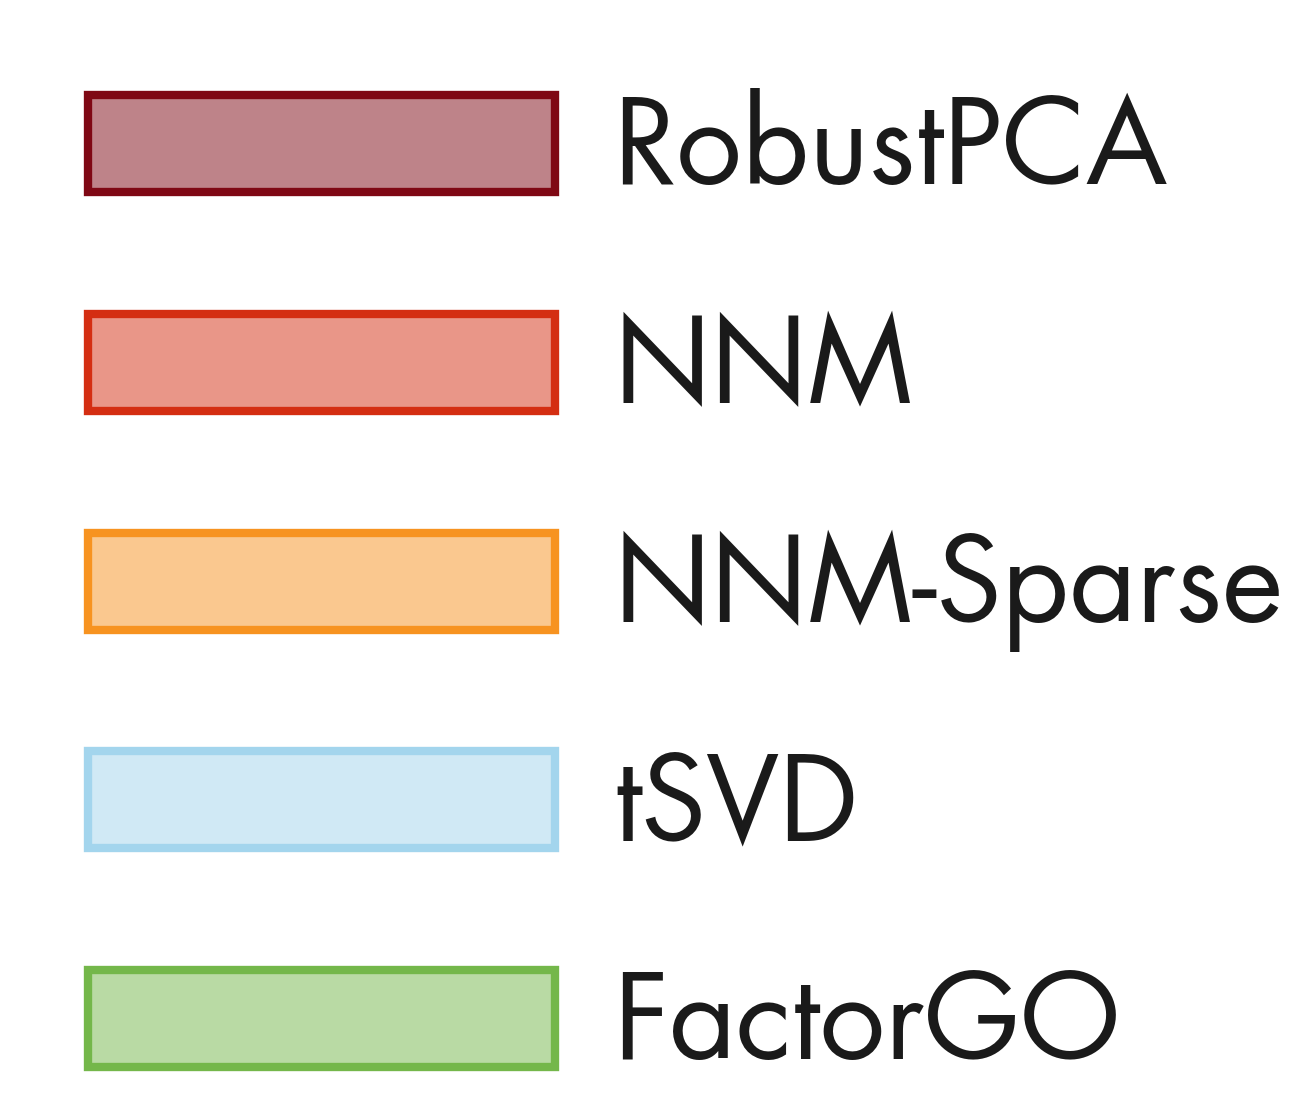

In [5]:
fig = plt.figure(figsize = (5, 4.5))
ax1 = fig.add_subplot(111)
handles = [boxs[mkey]["boxes"][0] for mkey in methods.keys()]
labels = [method_labels[mkey] for mkey in methods.keys()]
ax1.legend(handles = handles, labels = labels, loc = 'upper left', frameon = False, handlelength = 4, ncol = 1)

for side, border in ax1.spines.items():
    border.set_visible(False)
ax1.tick_params(bottom = False, top = False, left = False, right = False,
                   labelbottom = False, labeltop = False, labelleft = False, labelright = False)


plt.savefig('../plots/probgen24/numerical_experiments_legend.png', bbox_inches='tight')
plt.show()

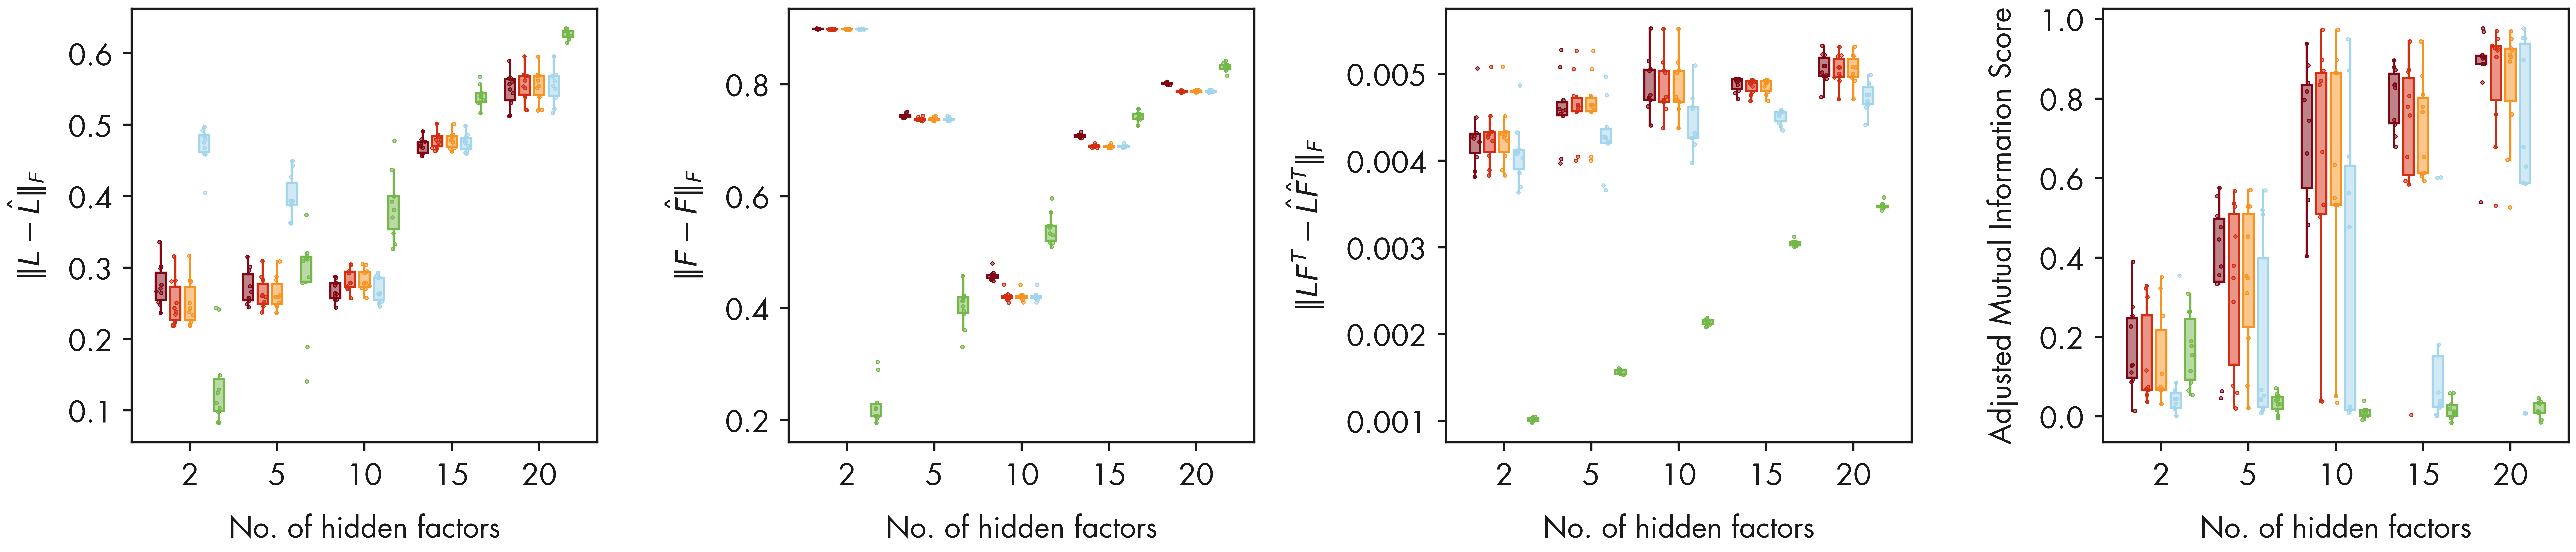

In [9]:
variable = 'k'
variable_values = [2,5,10,15,20]

axs, boxs = boxplot_scores(variable, variable_values, xlabel = "No. of hidden factors")

plt.savefig('../plots/probgen24/numerical_experiments_hidden_factors.png', bbox_inches='tight')
plt.show()

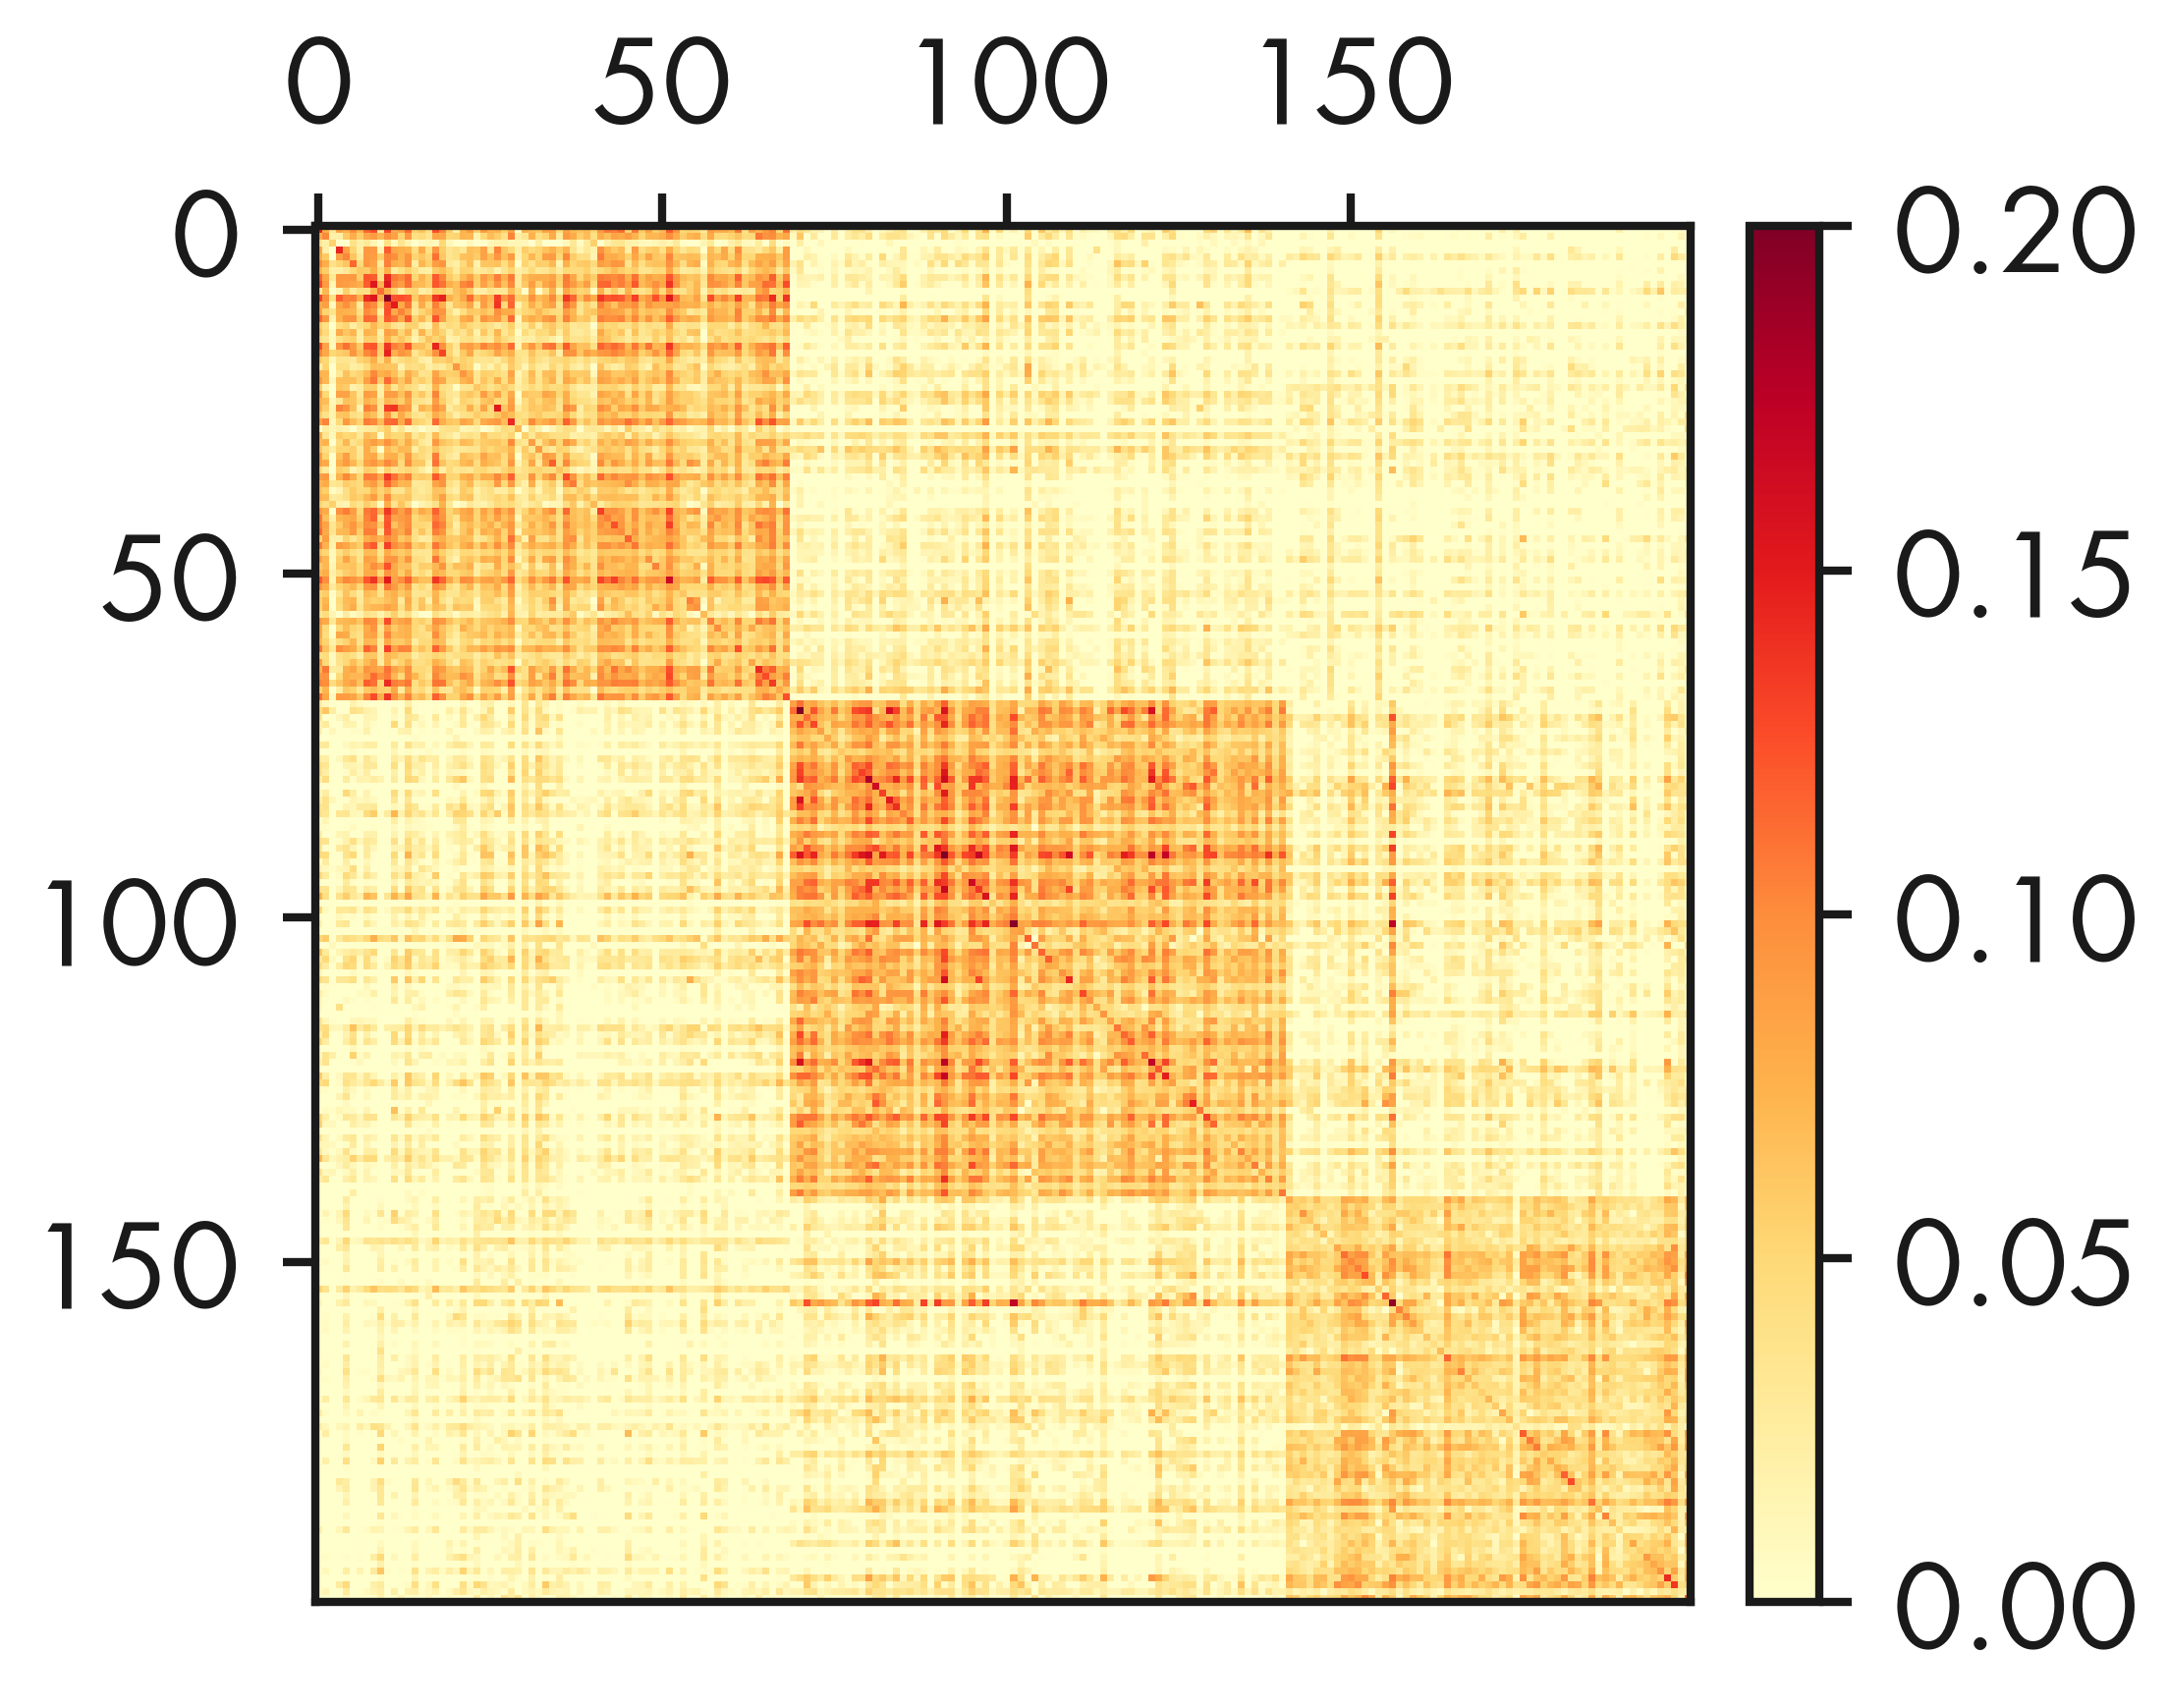

In [22]:
simdata_filename = os.path.join(dsc_output, "blockdiag/blockdiag_7.pkl")
with open(simdata_filename, "rb") as fh:
    simdata = pickle.load(fh)

sys.path.append("../utils/")
import plot_functions as mpy_plotfn

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

nsample, p = simdata['Z'].shape
k = simdata['Ltrue'].shape[1]
# mpy_plotfn.plot_covariance_heatmap(ax1, simdata['Z'] * np.sqrt(p) / np.sqrt(nsample))
mpy_plotfn.plot_covariance_heatmap(ax1, simdata['Ltrue'] * np.sqrt(k), vmax = 0.2)

plt.tight_layout()
plt.savefig('../plots/probgen24/numerical_experiments_Ltrue_covariance_heatmap.png', bbox_inches='tight')
plt.show()

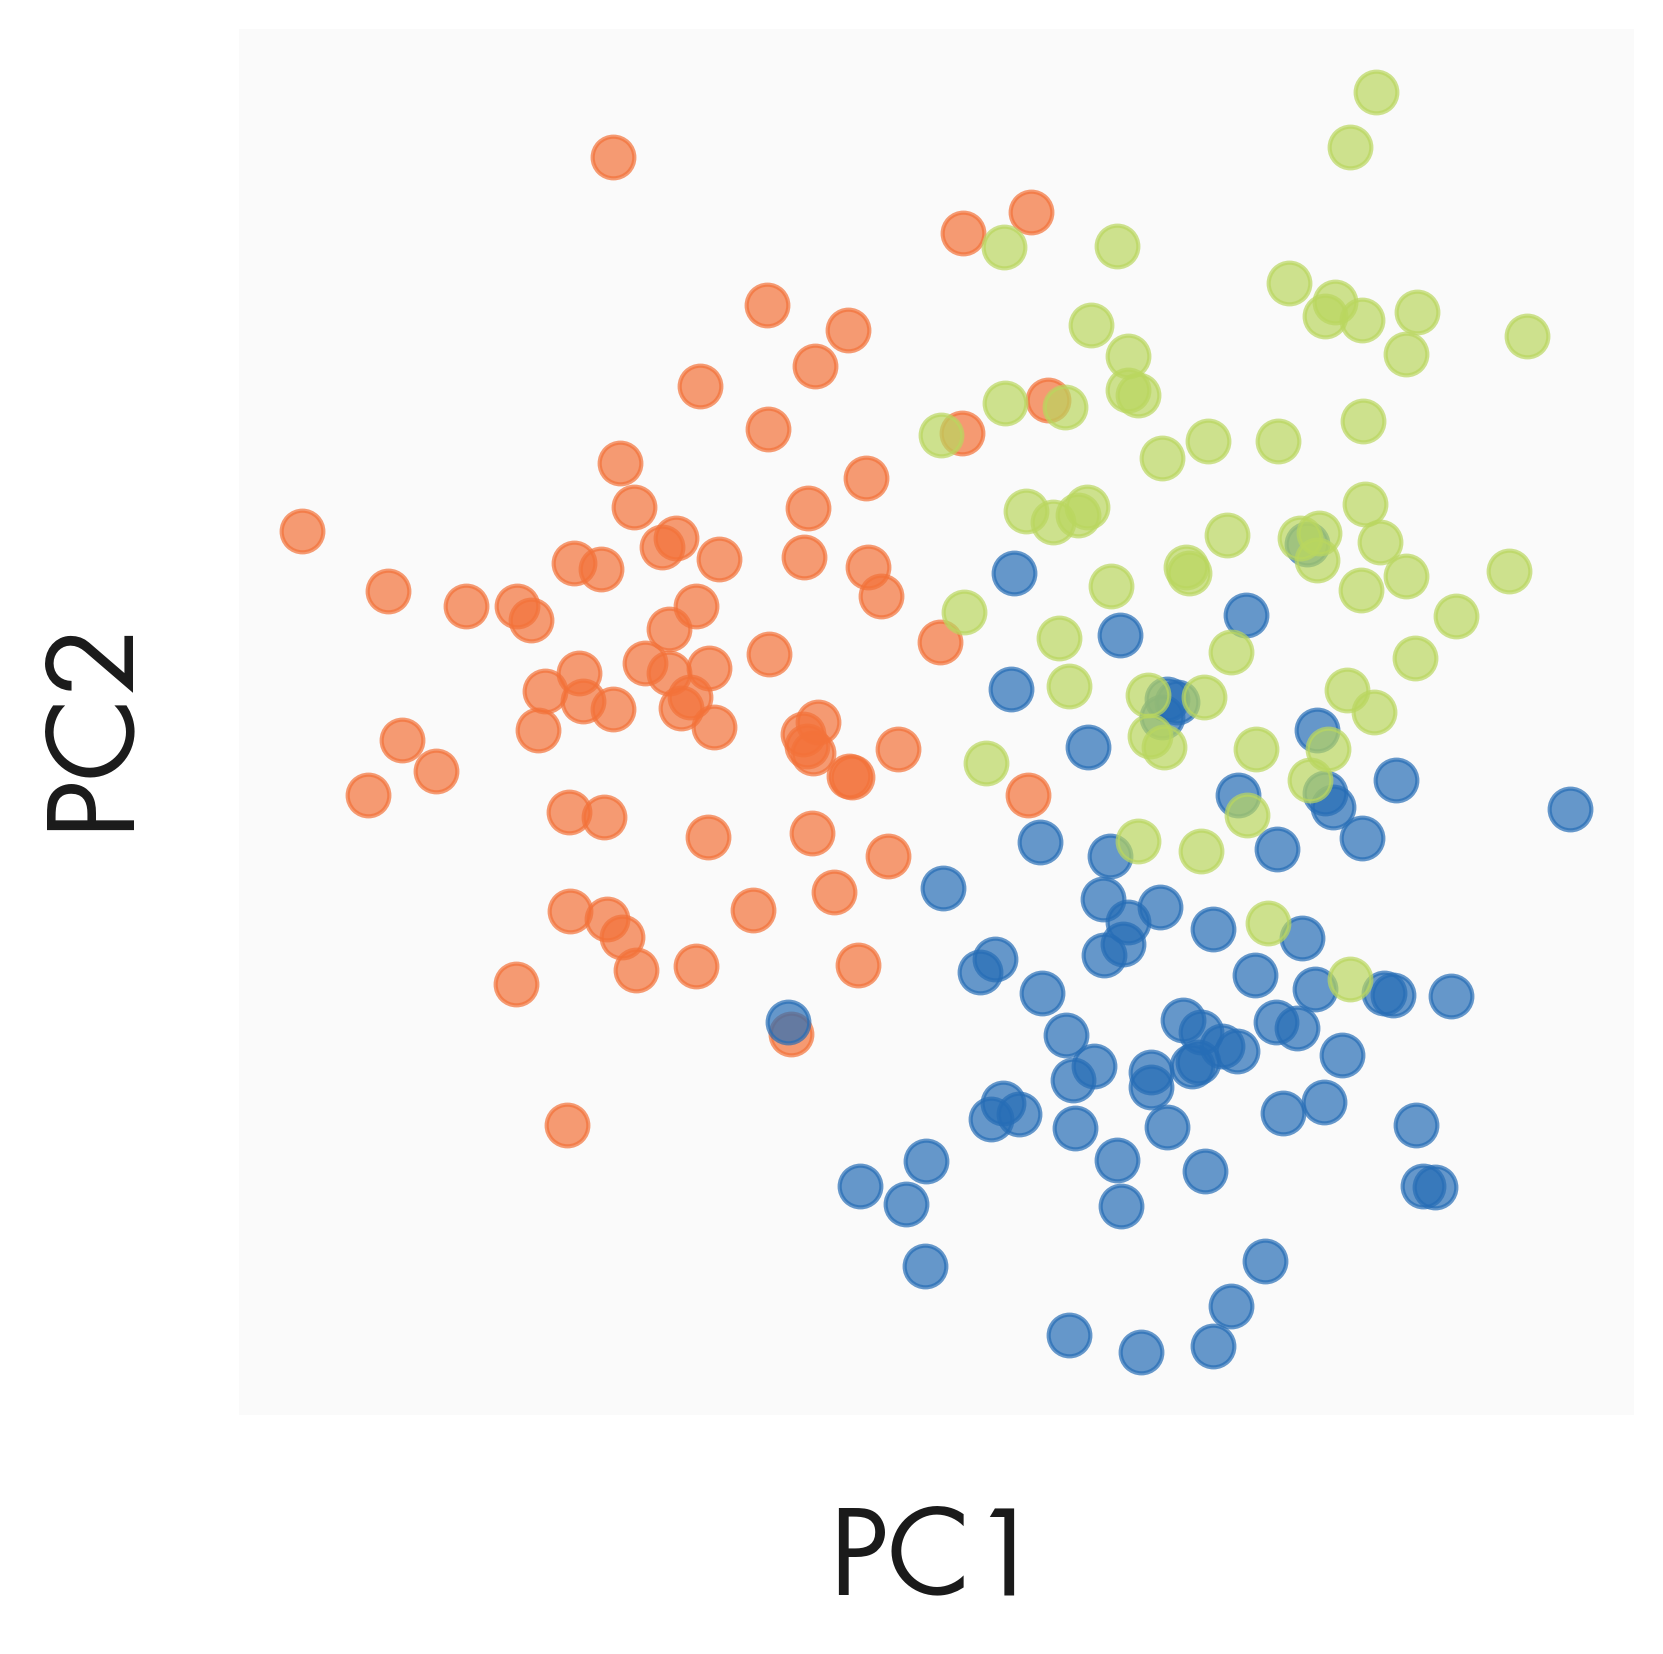

In [39]:
fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)

def make_plot_pca(ax, comp, labels, unique_labels, colorlist, bgcolor = "#F0F0F0"):
    pc1 = comp[:, 0]
    pc2 = comp[:, 1]
    for i, label in enumerate(unique_labels):
        idx = np.array([k for k, x in enumerate(labels) if x == label])
        ax.scatter(pc1[idx], pc2[idx], s = 100, alpha = 0.7, label = label, color = colorlist[i])
    ax.tick_params(bottom = False, top = False, left = False, right = False,
        labelbottom = False, labeltop = False, labelleft = False, labelright = False)
    ax.patch.set_facecolor(bgcolor)
    ax.patch.set_alpha(0.3)
    for side, border in ax.spines.items():
        border.set_visible(False)
    return

colorlist = [nygc_colors[x] for x in ['orange', 'blue', 'yellowgreen']]
make_plot_pca(ax1, simdata['Ltrue'], simdata['Ctrue'], list(set(simdata['Ctrue'])), colorlist)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
plt.savefig('../plots/probgen24/numerical_experiments_Ltrue_principal_components.png', bbox_inches='tight')
plt.show()

# Structure Plot from PGC

In [43]:
mf_methods = ['ialm', 'nnm', 'nnm_sparse']
lowrank_X = dict()

def get_nan_centered_Z(df):
    X_nan = np.array(zscore_df).T
    X_nan_cent = X_nan - np.nanmean(X_nan, axis = 0, keepdims = True)
    X_nan_mask = np.isnan(X_nan)
    X_cent = np.nan_to_num(X_nan_cent, copy = True, nan = 0.0)
    return X_cent

zscore_df = pd.read_pickle(f"../data/zscore_df.pkl")
X_cent = get_nan_centered_Z(zscore_df)

for method in mf_methods:
    with open (f"../data/lowrank_X_{method}.pkl", 'rb') as handle:
        lowrank_X[method] = pickle.load(handle)

In [44]:
def compute_loadings_factors(X, k = None):
    #X_cent = mpy_simulate.do_standardize(X, scale = False)
    #X_cent /= np.sqrt(np.prod(X_cent.shape))
    U, S, Vt = np.linalg.svd(X, full_matrices = False)
    S2 = np.square(S)
    explained_variance = S2 / np.sum(S2)
    if k is None:
        k = np.where(explained_variance < 1e-4)[0][0] - 1
    U_low = U[:, :k]
    S_low = S[:k]
    factors = Vt[:k, :].T
    loadings = U_low @ np.diag(S_low)
    return U_low, S_low, loadings, factors

loadings  = dict()
factors   = dict()
eigenvals = dict()

_, eigenvals['tsvd'], loadings['tsvd'], factors['tsvd'] = compute_loadings_factors(X_cent, k = 30)
for m in mf_methods:
     _, eigenvals[m], loadings[m], factors[m] = compute_loadings_factors(lowrank_X[m])

In [45]:
# def get_cos2_scores(pcomps):
#     ntrait, npcomp = pcomps.shape
#     x = np.zeros((ntrait, npcomp))
#     for i in range(ntrait):
#         cos2_trait = np.array([np.square(pcomps[i, pcidx]) for pcidx in range(npcomp)])
#         x[i, :] = cos2_trait / np.sum(cos2_trait)
#     return x

def compute_cos(factor):
    return (factor ** 2) / (np.sum(factor ** 2, axis = 1).reshape((factor.shape[0], 1)))

def stacked_barplot(ax, data, xlabels, colors, bar_width = 1.0, alpha = 1.0, showxlabels = False):
    '''
    Parameters
    ----------
        data: 
            dict() of scores. 
            - <key> : items for the stacked bars (e.g. traits or components)
            - <value> : list of scores for the items. All dict entries must have the same length of <value>
        xlabels: 
            label for each entry in the data <value> list. Must be of same length of data <value>
        colors: 
            dict(<key>, <color>) corresponding to each data <key>.
    '''
    indices = np.arange(len(xlabels))
    bottom = np.zeros(len(xlabels))

    for item, weights in data.items():
        ax.bar(indices, weights, bar_width, label = item, bottom = bottom, color = colors[item], alpha = alpha)
        bottom += weights

    if showxlabels:
        ax.set_xticks(indices)
        ax.set_xticklabels(xlabels, rotation=90, ha='center')
        ax.tick_params(bottom = True, top = False, left = False, right = False,
                   labelbottom = True, labeltop = False, labelleft = False, labelright = False)
    else:
        ax.tick_params(bottom = False, top = False, left = False, right = False,
                   labelbottom = False, labeltop = False, labelleft = False, labelright = False)

    for side, border in ax.spines.items():
        border.set_visible(False)

    return


def structure_plot(ax, pcomps, trait_labels, comp_colors, npcomp, showxlabels = False):
    cos2_scores = compute_cos(pcomps)
    cos2_plot_data = {
        f"{i+1}" : cos2_scores[:, i] for i in range(npcomp)
    }
    stacked_barplot(ax, cos2_plot_data, trait_labels, comp_colors, alpha = 0.8, showxlabels = showxlabels)
    return

In [74]:
phenotype_dict_readable = {
    'AD_sumstats_Jansenetal_2019sept.txt.gz' : 'Alzheimers Disease - Jansen 2019',
    'anxiety.meta.full.cc.txt.gz' : 'Anxiety',
    'anxiety.meta.full.fs.txt.gz' : 'Anxiety',
    'CNCR_Insomnia_all' : 'Insomnia',
    'daner_adhd_meta_filtered_NA_iPSYCH23_PGC11_sigPCs_woSEX_2ell6sd_EUR_Neff_70.txt.gz' : 
        'PGC - ADHD 2019',
    'daner_PGC_BIP32b_mds7a_0416a.txt.gz' : 'PGC - Bipolar Disorder 2019',
    'daner_PGC_BIP32b_mds7a_mds7a_BD1.0416a_INFO6_A5_NTOT.txt.gz' : 'PGC - Bipolar Disorder I 2019',
    'daner_PGC_BIP32b_mds7a_mds7a_BD2.0416a_INFO6_A5_NTOT.txt.gz' : 'PGC - Bipolar Disorder II 2019',
    'ENIGMA_Intracraneal_Volume' : 'ENIGMA - Intracraneal Volume',
    'ieu-a-1000' : 'Neuroticism',
    'ieu-a-1041' : 'Intracranial volume',
    'ieu-a-1042' : 'Nucleus accumbens volume',
    'ieu-a-1043' : 'Amygdala volume',
    'ieu-a-1044' : 'Caudate volume',
    'ieu-a-1045' : 'Hippocampus volume',
    'ieu-a-1046' : 'Pallidum volume',
    'ieu-a-1047' : 'Putamen volume',
    'ieu-a-1048' : 'Thalamus volume',
    'ieu-a-1085' : 'Amyotrophic lateral sclerosis',
    'ieu-a-118' : 'Neuroticism',
    'ieu-a-1183' : 'ADHD',
    'ieu-a-1184' : 'Autism Spectrum Disorder',
    'ieu-a-1185' : 'Autism Spectrum Disorder',
    'ieu-a-1186' : 'Anorexia Nervosa',
    'ieu-a-1188' : 'Major Depressive Disorder',
    'ieu-a-1189' : 'Obsessive Compulsive Disorder',
    'ieu-a-22' : 'Schizophrenia',
    'ieu-a-297' : 'Alzheimers disease',
    'ieu-a-806' : 'Autism',
    'ieu-a-990' : 'Bulimia nervosa',
    'ieu-b-10' : 'Focal epilepsy',
    'ieu-b-11' : 'Focal epilepsy',
    'ieu-b-12' : 'Juvenile absence epilepsy',
    'ieu-b-13' : 'Childhood absence epilepsy',
    'ieu-b-14' : 'Focal epilepsy',
    'ieu-b-15' : 'Focal epilepsy',
    'ieu-b-16' : 'Generalized epilepsy',
    'ieu-b-17' : 'Juvenile myoclonic epilepsy',
    'ieu-b-18' : 'Multiple sclerosis',
    'ieu-b-2' : 'Alzheimers disease',
    'ieu-b-41' : 'Bipolar Disorder',
    'ieu-b-42' : 'Schizophrenia',
    'ieu-b-7' : 'Parkinsons',
    'ieu-b-8' : 'Epilepsy',
    'ieu-b-9' : 'Generalized epilepsy',
    'IGAP_Alzheimer' : 'Alzheimers Disease - IGAP 2018',
    'iPSYCH-PGC_ASD_Nov2017.txt.gz' : 'iPSYCH-PGC - ASD 2019',
    'Jones_et_al_2016_Chronotype' : 'Chronotype - Jones 2016',
    'Jones_et_al_2016_SleepDuration' : 'Sleep Duration - Jones 2016',
    'MDD_MHQ_BIP_METACARPA_INFO6_A5_NTOT_no23andMe_noUKBB.txt.gz' : 'PGC MDD + BD w/o 23andMe, UKB',
    'MDD_MHQ_METACARPA_INFO6_A5_NTOT_no23andMe_noUKBB.txt.gz' : 'PGC MDD w/o 23andMe, UKB',
    'MHQ_Depression_WG_MAF1_INFO4_HRC_Only_Filtered_Dups_FOR_METACARPA_INFO6_A5_NTOT.txt.gz' : 'PGC - Depression',
    'MHQ_Recurrent_Depression_WG_MAF1_INFO4_HRC_Only_Filtered_Dups_FOR_METACARPA_INFO6_A5_NTOT.txt.gz' : 'PGC - Recurrent Depression',
    'MHQ_Single_Depression_WG_MAF1_INFO4_HRC_Only_Filtered_Dups_FOR_METACARPA_INFO6_A5_NTOT.txt.gz' : 'PGC - Single Depression',
    'MHQ_Subthreshold_WG_MAF1_INFO4_HRC_Only_Filtered_Dups_FOR_METACARPA_INFO6_A5_NTOT.txt.gz' : 'PGC - Subthreshold MDD',
    'ocd_aug2017.txt.gz' : 'PGC - OCD 2017',
    'PGC_ADHD_EUR_2017' : 'PGC - ADHD EUR 2017',
    'PGC_ASD_2017_CEU' : 'PGC - ASD CEU 2017',
    'pgc-bip2021-all.vcf.txt.gz' : 'PGC - Bipolar Disorder 2021',
    'pgc-bip2021-BDI.vcf.txt.gz' : 'PGC - Bipolar Disorder I 2021',
    'pgc-bip2021-BDII.vcf.txt.gz' : 'PGC - Bipolar Disorder II 2021',
    'pgc.scz2' : 'PGC - Schizophrenia (2014)',
    'PGC3_SCZ_wave3_public.v2.txt.gz' : 'PGC - Schizophrenia 2022',
    'pgcAN2.2019-07.vcf.txt.gz' : 'PGC - Anorexia Nervosa 2019',
    'pts_all_freeze2_overall.txt.gz' : 'PGC - PTSD 2019',
    'SSGAC_Depressive_Symptoms' : 'SSGAC - Depressive Symptoms',
    'SSGAC_Education_Years_Pooled' : 'SSGAC - Education Years Pooled',
    'UKB_1160_Sleep_duration' : 'UKB_1160_Sleep_duration',
    'UKB_1180_Morning_or_evening_person_chronotype' : 'UKB - Chronotype',
    'UKB_1200_Sleeplessness_or_insomnia' : 'UKB - Sleeplessness/insomnia',
    'UKB_20002_1243_self_reported_psychological_or_psychiatric_problem' : 'UKB - Self-reported Psychiatric',
    'UKB_20002_1262_self_reported_parkinsons_disease' : 'UKB - Self-reported Parkinsons',
    'UKB_20002_1265_self_reported_migraine' : 'UKB - Self-reported Migraine',
    'UKB_20002_1289_self_reported_schizophrenia' : 'UKB - Self-reported Schizophrenia',
    'UKB_20002_1616_self_reported_insomnia' : 'UKB - Self-reported Insomnia',
    'UKB_20016_Fluid_intelligence_score' : 'UKB - Fluid intelligence score',
    'UKB_20127_Neuroticism_score' : 'UKB - Neuroticism score',
    'UKB_G40_Diagnoses_main_ICD10_G40_Epilepsy' : 'UKB - G40 Epilepsy',
    'UKB_G43_Diagnoses_main_ICD10_G43_Migraine' : 'UKB - G43 Migraine',
    'ieu-b-5070' : 'Schizophrenia',
    'GPC-NEO-NEUROTICISM' : 'GPC - NEO Neuroticism',
    'ieu-a-1009' : 'Subjective well being',
    'ieu-a-1018' : 'Subjective well being',
    'ieu-a-1019' : 'Migraine in bipolar disorder',
    'ieu-a-1029' : 'Internalizing problems',
    'ieu-a-1061' : 'G speed factor',
    'ieu-a-1062' : 'Symbol search',
    'ieu-a-1063' : '8-choice reaction time',
    'ieu-a-1064' : '2-choice reaction time',
    'ieu-a-1065' : 'Inspection time',
    'ieu-a-1066' : 'Simple reaction time',
    'ieu-a-1067' : 'Digit symbol',
    'ieu-a-1068' : '4-choice reaction time',
    'ieu-a-45' : 'Anorexia nervosa',
    'ieu-a-298' : 'Alzheimers Disease',
    'ieu-a-808' : 'Bipolar Disorder',
    'ieu-a-810' : 'Schizophrenia',
    'ieu-a-812' : 'Parkinsons',
    'ieu-a-818' : 'Parkinsons',
    'ieu-a-824' : 'Alzheimers Disease',
    'ieu-b-43' : 'frontotemporal dementia',
    'ILAE_Genetic_generalised_epilepsy' : 'ILAE_Genetic_generalised_epilepsy'
}

labels_readable = [phenotype_dict_readable[x] for x in zscore_df.columns]
labels_readable

['Alzheimers Disease - Jansen 2019',
 'Insomnia',
 'GPC - NEO Neuroticism',
 'Alzheimers Disease - IGAP 2018',
 'Chronotype - Jones 2016',
 'Sleep Duration - Jones 2016',
 'PGC MDD + BD w/o 23andMe, UKB',
 'PGC MDD w/o 23andMe, UKB',
 'PGC - Depression',
 'PGC - Recurrent Depression',
 'PGC - Single Depression',
 'PGC - Subthreshold MDD',
 'PGC - Schizophrenia 2022',
 'PGC - ADHD EUR 2017',
 'PGC - ASD CEU 2017',
 'SSGAC - Depressive Symptoms',
 'SSGAC - Education Years Pooled',
 'UKB_1160_Sleep_duration',
 'UKB - Chronotype',
 'UKB - Sleeplessness/insomnia',
 'UKB - Self-reported Psychiatric',
 'UKB - Self-reported Parkinsons',
 'UKB - Self-reported Migraine',
 'UKB - Self-reported Schizophrenia',
 'UKB - Self-reported Insomnia',
 'UKB - Fluid intelligence score',
 'UKB - Neuroticism score',
 'UKB - G40 Epilepsy',
 'UKB - G43 Migraine',
 'Anxiety',
 'Anxiety',
 'PGC - Bipolar Disorder 2019',
 'PGC - Bipolar Disorder I 2019',
 'PGC - Bipolar Disorder II 2019',
 'PGC - ADHD 2019',
 'iPS

In [75]:
from matplotlib.gridspec import GridSpec

plot_methods = {
    'tsvd' : 'tSVD',
    'ialm' : 'RobustPCA',
    'nnm'  : 'NNM',
    'nnm_sparse' : 'NNM-Sparse',
}
npcomp = 10

# trait_indices_sorted = list()
# for idx in trait_indices:
#     trait_indices_sorted += list(idx)

# trait_labels_sorted = [labels_readable[i] for i in trait_indices_sorted]
pcomp_colors  = {f"{i+1}": color for i, color in enumerate(mpl_stylesheet.kelly_colors() + mpl_stylesheet.banskt_colors())}
    
fig = plt.figure(figsize = (32, 32))
gs = GridSpec(nrows = len(plot_methods) + 1, ncols=1, figure=fig, height_ratios=[0.3] + [1 for i in plot_methods])
ax = [None for i in range(len(plot_methods) + 1)]
ax[0] = fig.add_subplot(gs[0, 0])

for i, m in enumerate(plot_methods.keys()):
    iplot = i + 1
    showxlabels = True if iplot == len(plot_methods) else False
    ax[iplot] = fig.add_subplot(gs[iplot, 0])
    structure_plot(ax[iplot], loadings[m], labels_readable, pcomp_colors, npcomp, showxlabels = showxlabels)
    ax[iplot].set_title(plot_methods[m], fontsize = 32)
    
plt_handles, plt_labels = ax[i].get_legend_handles_labels()
ax[0].legend(plt_handles, plt_labels, 
             loc = 'lower center', bbox_to_anchor=(0.5, 0), title = "Principal Components",
             frameon = False, handlelength = 8, ncol = 5)
for side, border in ax[0].spines.items():
    border.set_visible(False)
ax[0].tick_params(bottom = False, top = False, left = False, right = False,
                   labelbottom = False, labeltop = False, labelleft = False, labelright = False)

#legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.tight_layout(h_pad = 2.0)

plt.savefig('../plots/probgen24/pgc_structure_plot.png', bbox_inches='tight')
plt.show()